In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
try:
    #plt.style.use('belle2')
    plt.style.use('belle2_serif')
    #plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

In [2]:
import os
from os import path
from yaml import safe_load

from hist.get_data import get_data
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict

print(os.getcwd())

Welcome to JupyROOT 6.26/00
For optimal usage set `plt.style.use('belle2')`
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
{'Vegetables': ['Pepper', 'Tomato', 'Garlic']}
/home/jykim/workspace/DRAW


In [3]:
plot_variables = read_yaml_to_dict("plot_variables")
print(plot_variables)

{'vars': ['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal'], 'units': {'D0_M': 'M(D^0)', 'Dstarp_Q': 'D^{*+}_Q', 'D0_cosHel_0': '\\mathrm{cos}Hel_0', 'gamma_E': 'E_{\\gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(\\gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'True Dstar', 'D0_isSignal': 'True D0'}}


In [4]:
location='lab'
#locatoin='kekcc'
location='laptop'

In [5]:
sample_info = read_yaml_to_dict("samples")
print(sample_info)

{'pid_0_5': {'ccbar': '/ccbar/pid_0_5_ccbar_recon_output_0*.root', 'charged': '/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'}, 'location': {'kekcc': '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg', 'lab': '/home/jykim/nas/storage/01_recon/merge_generic_bkg', 'home': '', 'laptop': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg'}}


In [6]:
def sample_name(option=None, location=None ):

    for i in sample_info['location']:
        if i == location:
            ccbar_sample = sample_info['location'][location] + sample_info[option]['ccbar']
            charged_sample = sample_info['location'][location] + sample_info[option]['charged']
            mixed_sample = sample_info['location'][location] + sample_info[option]['mixed']
            uubar_sample = sample_info['location'][location] + sample_info[option]['uubar']
            ddbar_sample = sample_info['location'][location] + sample_info[option]['ddbar']
            ssbar_sample = sample_info['location'][location] + sample_info[option]['ssbar']
            taupair_sample = sample_info['location'][location] + sample_info[option]['taupair']

            sample_location={}
            sample_location["ccbar"]=ccbar_sample
            sample_location["charged"]=charged_sample
            sample_location["mixed"]=mixed_sample
            sample_location["uubar"]=uubar_sample
            sample_location["ddbar"]=ddbar_sample
            sample_location["ssbar"]=ssbar_sample
            sample_location["taupair"]=taupair_sample

    return sample_location
  
sample_loc=sample_name(option='pid_0_5', location=location) 
print(sample_loc )



{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/pid_0_5_ccbar_recon_output_0*.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/pid_0_5_taupair_recon_output_0*.root'}


In [7]:
pd_df = generic_ntuple(vector='phi', variables_dict=plot_variables,sample_location=sample_loc)

NameError: name 'sample_location' is not defined

In [19]:
plt.hist(pd_df.D0_M , label=r'$\rho^0$ bkg',bins=100,  histtype='step') 

NameError: name 'pd_df' is not defined

In [21]:
#file = '/group/belle/users/jaeyoung/storage/01_recon/train/recon_output.root'
# file = '/home/jykim/nas/storage/01_recon/merge_generic_bkg/ccbar/train_v1_yes_signal_ccbar_recon_output_0*.root'
file = charged_sample
#file = '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg/charged/train_v1_yes_signal_charged_recon_output_01.root'
tree = 'rho'
base_filter = '(D0_M>1.665 && D0_M<2.065) && (gamma_E>0.55)  && ( abs(Rho_M- 0.77526) < 0.150 ) &&  Dstarp_CMS_p>2.72 && abs(Dstarp_Q-0.00593)<0.0006'
#variables=['pip_E','pim_E','pi0_E','pip_px','pim_px','pi0_px','pip_py','pim_py','pi0_py','pip_pz','pim_pz','pi0_pz']
variables=['D0_M']

pd_df = get_data(file=file, tree=tree,variables=variables ,base_filter=base_filter)
print(pd_df.describe())


             D0_M
count  494.000000
mean     1.843708
std      0.114045
min      1.665349
25%      1.743349
50%      1.837982
75%      1.933589
max      2.064288


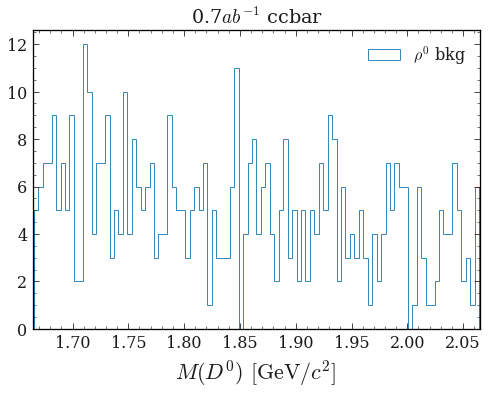

In [22]:
plt.hist(pd_df['D0_M'], label=r'$\rho^0$ bkg',bins=100,  histtype='step') 
ax = plt.gca()
ax.set_xlim(1.665, 2.065)   
xlabel = r'$M(D^0)$ $[\mathrm{GeV}/c^2]$ '
plot_title =  '0.7$ab^{-1}$ ccbar'

ax.set_xlabel(xlabel)
plt.title(plot_title)
plt.legend()